In [145]:
#Problem statement
#Import the Data Set and do the data preprocessing
#Problem Statement -
# Develop a sentiment analysis model to classify reviews as positive or negative.

#Preprocess the review text using techniques such as Lower casing, removing stop words and Lemmatization

#use the trained model accurately predict the sentiment of new, unseen reviews.

In [146]:
#Description
# with the rapid growth of online platforms for sharing opinions and reviews, restarunts often rely 
# on the customer feedback to imporve their services and attract a new customers.
# Analyzing the sentiment of these reviews can provide valuable insights into customer satisfaction.

In [42]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import pandas as pd

In [44]:
data = pd.read_csv('Reviews.csv')

In [45]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [46]:
#Review the top 5 rows
data.head() # here giving arguments is optional, by default it will take 5 - which gives first 5 records

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [47]:
data.tail() # Last 5 rows of the data set

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [48]:
data.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [49]:
data.info() # information of the dat set like , data type , memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [50]:
data.describe() # stastical information of the data set

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [51]:
# TO CHECK NULL VALUES
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [52]:
#TO CHECK DUPLICATED VALUES
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [53]:
#checking the value counts
value_counts = data['Liked'].value_counts()
print(value_counts)

Liked
1    500
0    500
Name: count, dtype: int64


In [54]:
# TO UNDERSTAND THE DATA IN GRAPHICAL/PICTORIAL MANNER, we need to use EDA - Exploratory Data Analysis

In [55]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

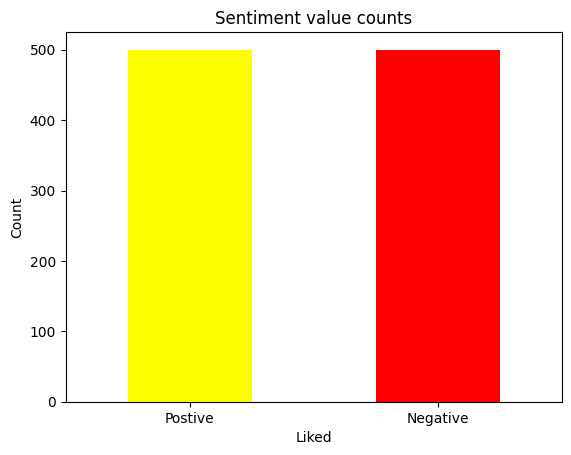

In [152]:
value_counts.plot(kind = 'bar' , color = ['yellow', 'red'])
plt.title("Sentiment value counts")
plt.xlabel('Liked')
plt.ylabel('Count')
plt.xticks(ticks=[0,1] , labels=['Postive','Negative'],rotation=0)
plt.show()

In [59]:
pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from wordcloud import WordCloud

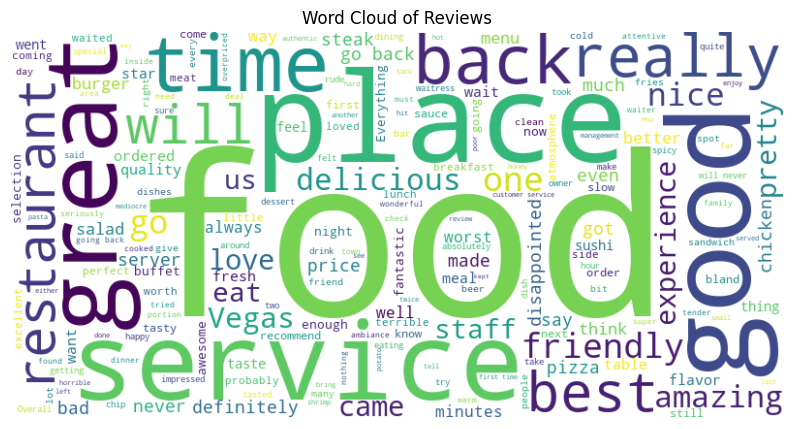

In [61]:
combined_text = " ".join(data['Review'])
wordcloud = WordCloud(width = 800 , height = 400 ,background_color = 'white').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [62]:
from collections import Counter

In [63]:
targeted_words = ['good', 'great', 'amazing', 'love', 'worth', 'best','better','bad','nice','pretty','excellent']
all_words = " ".join(data['Review']).lower().split() # flattern reviews into a singlie list of words
word_counts = Counter(all_words) # count of target words
target_word_count = {word: word_counts[word] for word in targeted_words}

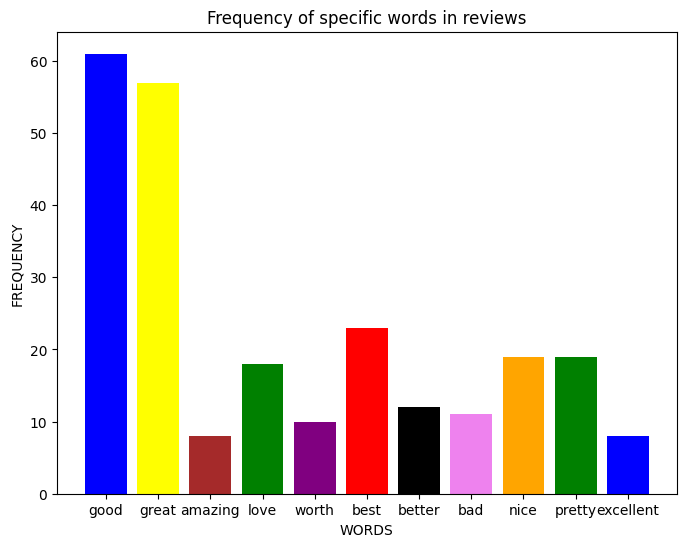

In [153]:
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values(), color = ['blue', 'yellow', 'brown', 'green', 'purple','red','black','violet','orange','green','blue'])
plt.xlabel('WORDS')
plt.ylabel('FREQUENCY')
plt.title('Frequency of specific words in reviews')
plt.show()

In [65]:
#Text preprocessing

In [66]:
#convert a data set into lower case
lowercased_text = data['Review'].str.lower()

In [67]:
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [78]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\godugu naga
[nltk_data]     bhargavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\godugu naga
[nltk_data]     bhargavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
#tokinization
from nltk.tokenize import word_tokenize

In [80]:
data['Tokens'] = data['Review'].apply(word_tokenize)

In [81]:
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [83]:
data['Review'].value_counts()

Review
#NAME?                                                                                                                                    4
The food was terrible.                                                                                                                    2
I would not recommend this place.                                                                                                         2
I love this place.                                                                                                                        2
I won't be back.                                                                                                                          2
                                                                                                                                         ..
OMG, the food was delicioso!                                                                                                              1
There is noth

In [84]:
import string

In [85]:
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)

In [86]:
print(data['Review'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [87]:
data['Review'].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [88]:
#Removing the stop words like this, is , are ,was 
from nltk.corpus import stopwords

In [89]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\godugu naga
[nltk_data]     bhargavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
stop_words = set(stopwords.words('english'))

In [91]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [92]:
print(data['Tokens'])

0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                           [Not, tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                  [The, selection, menu, great, prices]
                             ...                        
995           [I, think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997             [Overall, I, impressed, would, go, back]
998    [The, whole, experience, underwhelming, I, thi...
999    [Then, I, wasted, enough, life, poured, salt, ...
Name: Tokens, Length: 1000, dtype: object


In [93]:
#stemming
#stemming is the process of reducing the a word into root or base word form by removig suffix 
#example : driving stemmed is drive

In [94]:
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [95]:
stemmer = PorterStemmer()

In [96]:
data['stemmed'] = data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [97]:
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [98]:
#Lemmatization
#Lemmatization is the process transforming a word into its base or dictionary form
#example is better is lemmtized to good 

In [102]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\godugu naga
[nltk_data]     bhargavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [103]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [104]:
lemmatizer = WordNetLemmatizer()

In [105]:
data['Lemmatized'] = data['Review'].apply(lambda x :' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))

In [106]:
print(data['Lemmatized'])

0                                   Wow Loved this place
1                                      Crust be not good
2                Not tasty and the texture be just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                                Appetite instantly go
997       Overall I be not impress and would not go back
998    The whole experience be underwhelming and I th...
999    Then as if I hadn t waste enough of my life th...
Name: Lemmatized, Length: 1000, dtype: object


In [107]:
#Removing the numbers from reviews
import re
data['No_Numbers'] = data['Review'].apply(lambda x : re.sub(r'\d+',' ' ,x))

In [108]:
print(data['No_Numbers'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [109]:
#removing special characters like @ # %,*
data['cleaned_text'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]',' ' ,x))

In [110]:
print(data['cleaned_text'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned_text, Length: 1000, dtype: object


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   Lemmatized    1000 non-null   object
 5   No_Numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [112]:
# Normalization

In [113]:
# expanding method
# don't eat food in this hotel , when we apply expanted text it will convert into do not eat food in this hotel

In [114]:
pip install contractions


   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/289.9 kB 1.4 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/289.9 kB 495.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/289.9 kB 751.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/289.9 kB 731.4 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/289.9 kB 751.6 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/289.9 kB 778.2 kB/s eta 0:00:01
   -------------------------------------  286.7/289.9 kB 886.2 kB/s eta 0:00:01
   -------------------------------------- 289.9/289.9 kB 815.4 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)


In [116]:
print(data['Expanded'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Expanded, Length: 1000, dtype: object


In [117]:
#Removing emojis
!pip install emoji

   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
    --------------------------------------- 10.2/431.4 kB ? eta -:--:--
    --------------------------------------- 10.2/431.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/431.4 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/431.4 kB 409.6 kB/s eta 0:00:01
   ---------- --------------------------- 122.9/431.4 kB 602.4 kB/s eta 0:00:01
   ------------------- ------------------ 225.3/431.4 kB 919.0 kB/s eta 0:00:01
   ------------------- ------------------ 225.3/431.4 kB 919.0 kB/s eta 0:00:01
   ------------------- ------------------ 225.3/431.4 kB 919.0 kB/s eta 0:00:01
   ------------------------------- ------ 358.4/431.4 kB 928.4 kB/s eta 0:00:01
   ------------------------------------ - 419.8/431.4 kB 970.6 kB/s eta 0:00:01
   -------------------------------------- 431.4/431.4 kB 929.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)

In [119]:
print(data['emoji'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [120]:
# Removing HTML Tags

In [121]:
# removing liks from review_ text
# food is good vist www.abchotel.in

In [122]:
!pip install beautifulsoup4


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
from bs4 import BeautifulSoup

In [124]:
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())

In [125]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [126]:
#TF IDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [127]:
X = vectorizer.fit_transform(data['Review'])
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [128]:
#bulding a machine learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report


In [129]:
vectorizer = TfidfVectorizer()

In [130]:
X = vectorizer.fit_transform(data['Review'])
y = data['Liked']

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [132]:
print(X_train,X_test,y_train,y_test)

  (0, 1527)	0.578582388550776
  (0, 1516)	0.5587881819736206
  (0, 2005)	0.45560954528848707
  (0, 1938)	0.20794801889277578
  (0, 1778)	0.3196494189359375
  (1, 711)	0.4193390530637025
  (1, 622)	0.4193390530637025
  (1, 1180)	0.3554925882290983
  (1, 613)	0.32026666852400937
  (1, 1471)	0.272554926639921
  (1, 62)	0.5164170315313602
  (1, 263)	0.27998403419950374
  (2, 1057)	0.5102287539842273
  (2, 1962)	0.48790050997574835
  (2, 699)	0.3031291394604372
  (2, 1618)	0.5102287539842273
  (2, 1571)	0.3198299691276987
  (2, 1938)	0.21704341786509082
  (3, 1723)	0.4538927163856403
  (3, 1852)	0.42838721919777234
  (3, 719)	0.30305480231081033
  (3, 1791)	0.3192733609259723
  (3, 821)	0.37508854376741335
  (3, 590)	0.33614831815132157
  (3, 1471)	0.29501353406759745
  :	:
  (797, 1796)	0.2155139089210878
  (798, 649)	0.34296597014320795
  (798, 787)	0.34296597014320795
  (798, 17)	0.34296597014320795
  (798, 406)	0.32369375609078
  (798, 18)	0.34296597014320795
  (798, 122)	0.342965970143

In [133]:
model = MultinomialNB() 
model.fit(X_train,y_train)

MultinomialNB()

In [134]:
y_pred = model.predict(X_test)

In [135]:
accuracy = accuracy_score(y_test,y_pred)

In [136]:
report = classification_report(y_test,y_pred)

In [137]:
print(f'Accuracy {accuracy}')

Accuracy 0.8


In [138]:
print(f'Classfication Report:')
print(report)

Classfication Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [139]:
#prediction of new review
def preprocess_review(review):
    review = review.lower()
    review = BeautifulSoup(review,"html.parser").get_text()
    review = re.sub(f"[{string.punctuation}]"," ",review)
    review = contractions.fix(review)
    review = emoji.demojize(review)
    tokens = word_tokenize(review)
    stop_words =set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos = 'v') for word in tokens]
    cleaned_review = ' '.join(lemmatized_tokens)
    return cleaned_review

In [141]:
#new review prediction
new_review = input("Enter a review")
cleaned_review = preprocess_review(new_review)
new_review_vectorized = vectorizer.transform([cleaned_review])
prediction = model.predict(new_review_vectorized)
if prediction[0] == 1:
    print("The review is predicted postive")
else:
    print("The review is predicted negative")

Enter a review Food is amazing


The review is predicted postive
